First of all, we import the necessary packages

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np

In [105]:
sum([2,3,5]) #Fer la suma dels números 

10

<h3>What are we going to do?</h3>

We have data on the genome size of two groups of crustaceans. <b>Is the genome size of a group different than the other one?</b>

First thing is importing the data. We read it as a csv and say our data is separated by a tab (sep="\t") and that it has no header. We also change the names of the columns.

,group,genome
0,Decapods,1.60
1,Decapods,1.65
2,Decapods,1.80
3,Decapods,1.90
4,Decapods,1.94
5,Decapods,0.27
6,Decapods,0.44
7,Decapods,2.66
8,Decapods,2.78
9,Decapods,0.01


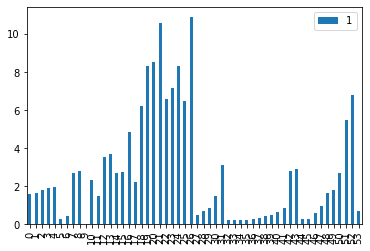

In [230]:
df = pd.read_csv('genome_size_long_format.txt', sep="\t", header=None)
df.plot(kind="bar")
df.columns=["group","genome"]
df[:10]

We group the data and calculate the mean of each group

In [108]:
df.groupby("group").mean()

,genome
group,
Decapods,4.133333
Isopods,1.377407


Plotting the mean of each group

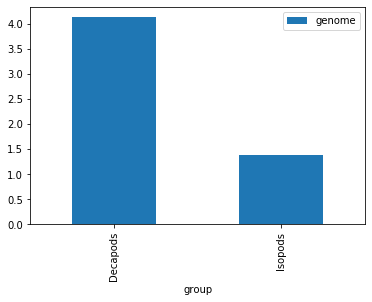

In [109]:
df.groupby("group").mean().plot(kind="bar")


<h3> Boxplot, two ways of doing it </h3>
We first do a boxplot of all data and then we do a separate boxplot for the two groups (decapods and isopods)

{'whiskers': [<matplotlib.lines.Line2D at 0x20cdb31f808>,
 'caps': [<matplotlib.lines.Line2D at 0x20cdb31fec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cdb31f148>],
 'medians': [<matplotlib.lines.Line2D at 0x20cdb325e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cdb325f48>],
 'means': []}

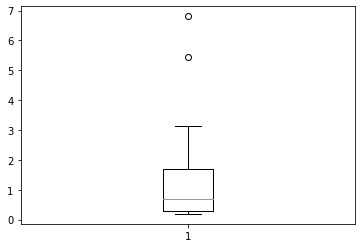

In [240]:
plt.boxplot(x.genome)


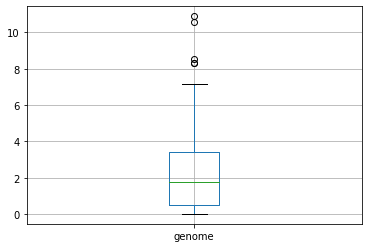

In [146]:
df.boxplot()

Decapods         AxesSubplot(0.1,0.15;0.363636x0.75)
Isopods     AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

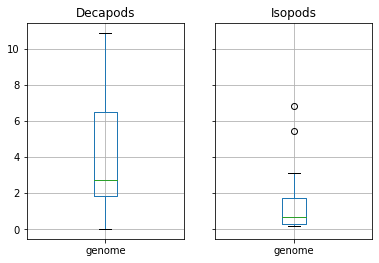

In [145]:
df.groupby("group").boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CD3419288>]],
      dtype=object)

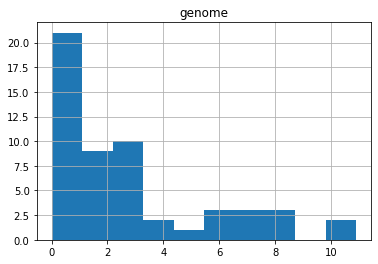

In [148]:
df.hist()

In [111]:
df.groupby("group").describe()

genome                                                    
          count      mean       std   min   25%   50%    75%    max
group                                                              
Decapods   27.0  4.133333  3.175416  0.01  1.85  2.75  6.515  10.89
Isopods    27.0  1.377407  1.653557  0.19  0.29  0.70  1.700   6.81

Decapods have a higher genome size than decapods, and the distribution is also more dispersed.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CD39D3E48>,
      dtype=object)

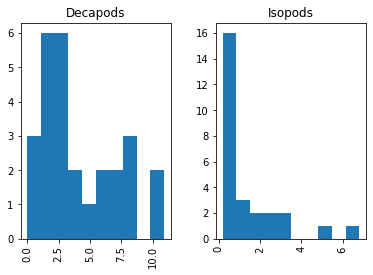

In [112]:
df.genome.hist(by=df.group)

This data does not look normal, as the histogram has not the gaussian shape.

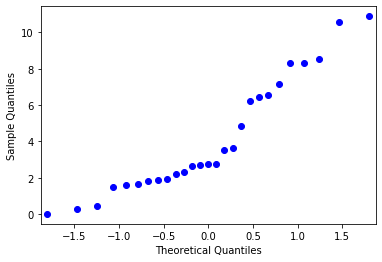

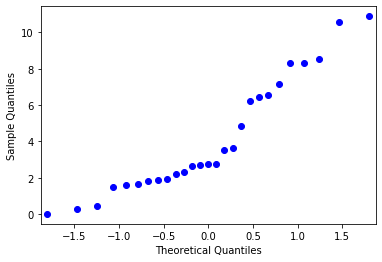

In [228]:
x=df[df.group == 'Decapods']
sm.qqplot(x.genome)

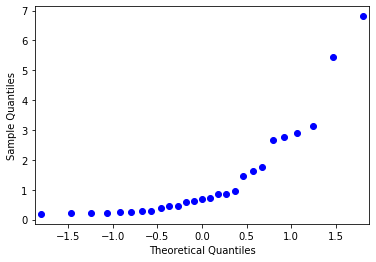

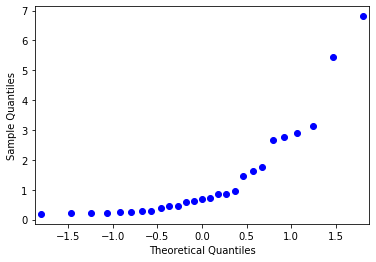

In [229]:
x=df[df.group == 'Isopods']
sm.qqplot(x.genome)

In [185]:
sm.qqplot(datagroup [1], line='q')

NameError: name 'datagroup' is not defined

In [193]:
g_df=df.groupby("group")
g_df.get_group("decapods")

KeyError: 'decapods'

In [194]:
sm.qqplot(df, line = "q")


TypeError: '<' not supported between instances of 'float' and 'str'

C:\Users\marta\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\marta\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\marta\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

C:\Users\marta\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\marta\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\marta\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

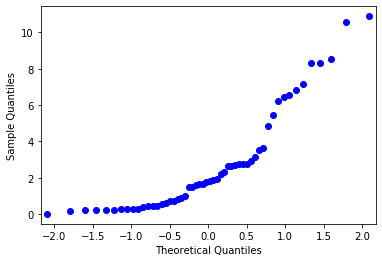

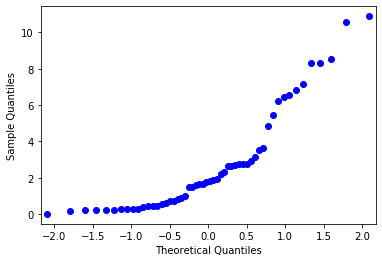

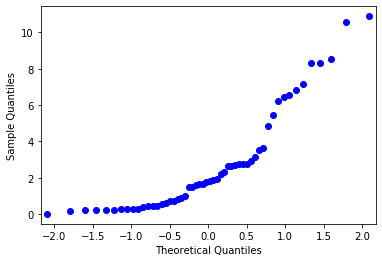

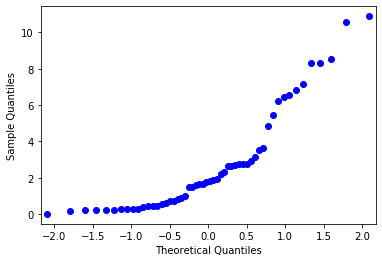

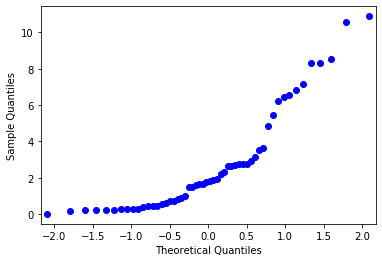

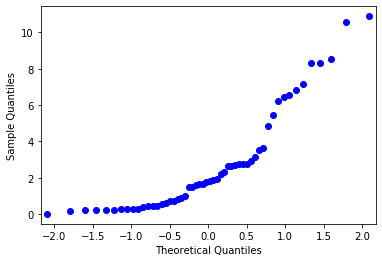

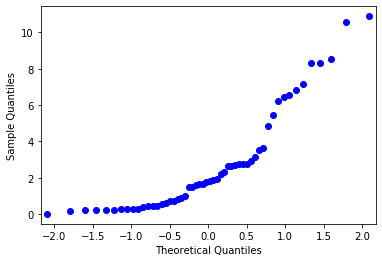

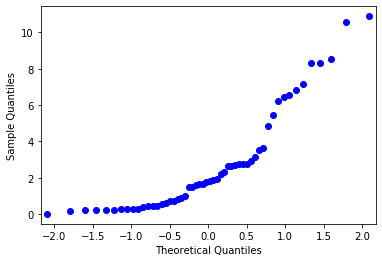

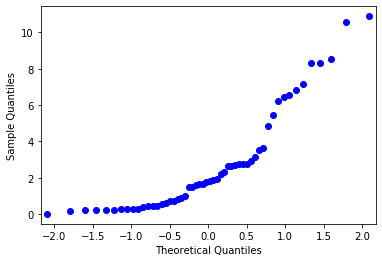

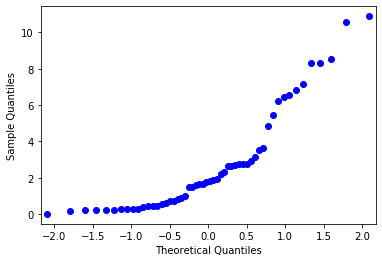

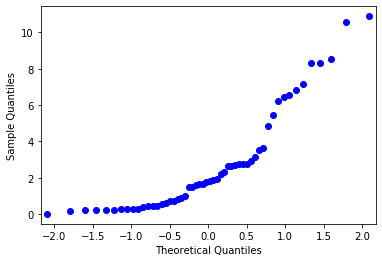

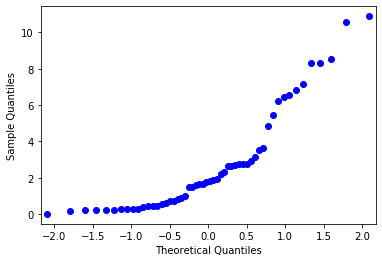

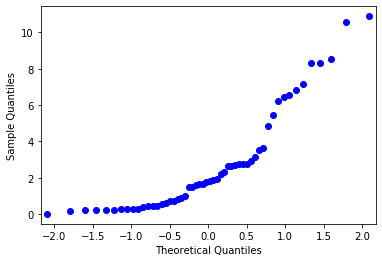

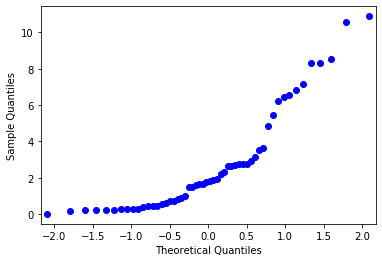

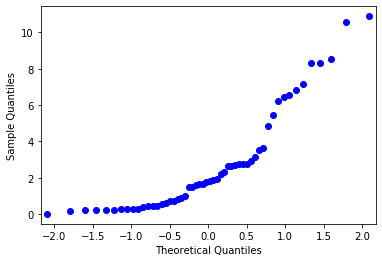

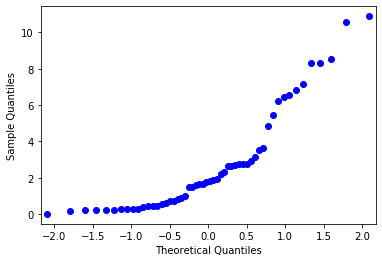

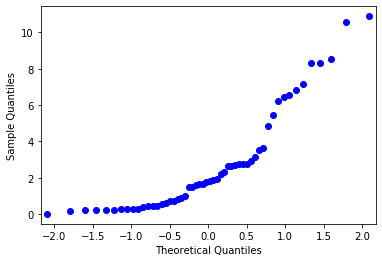

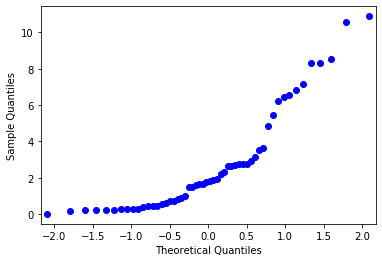

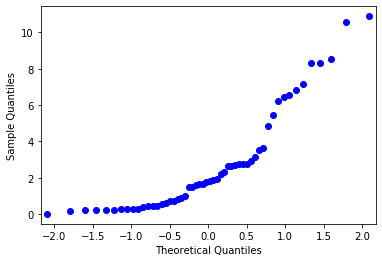

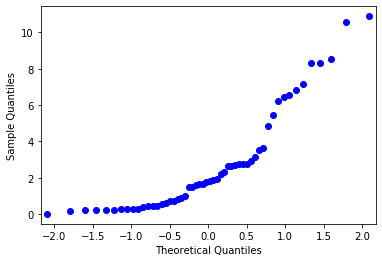

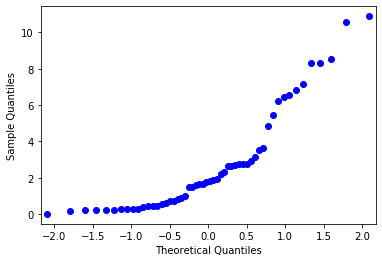

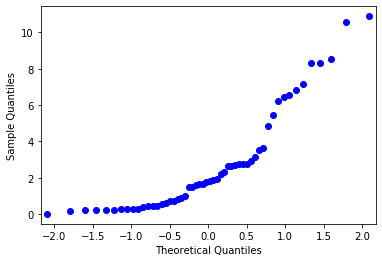

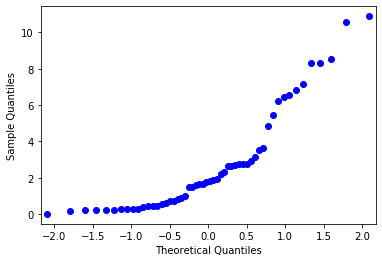

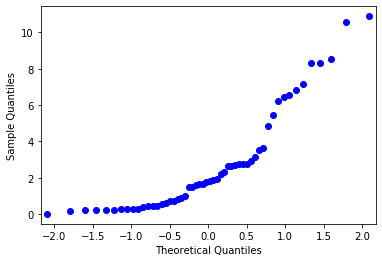

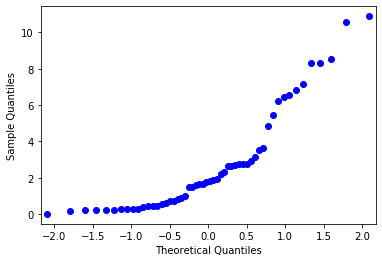

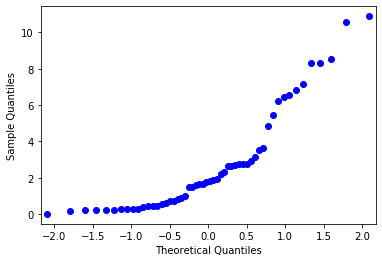

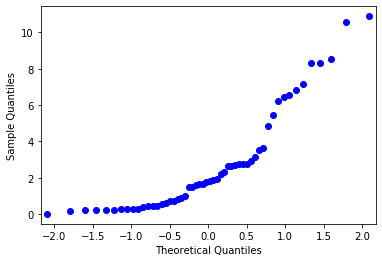

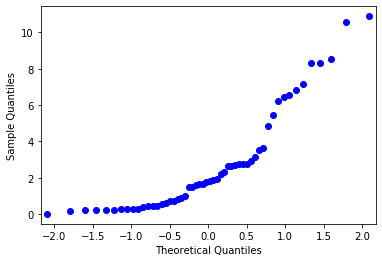

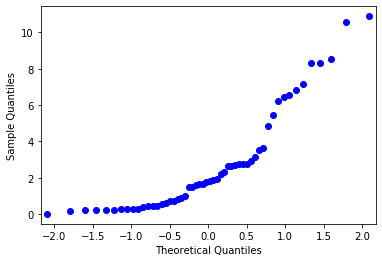

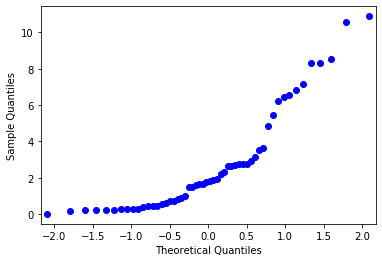

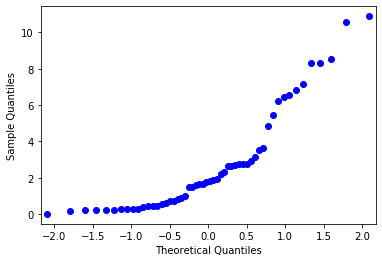

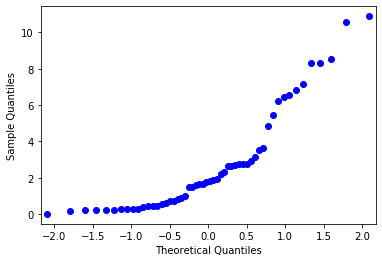

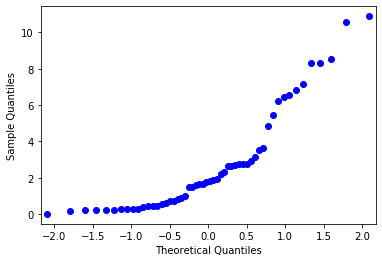

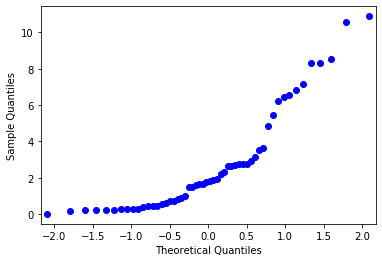

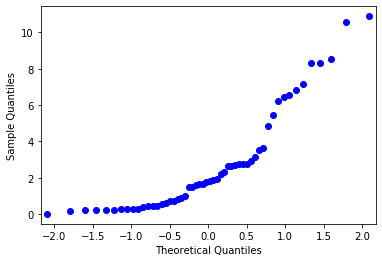

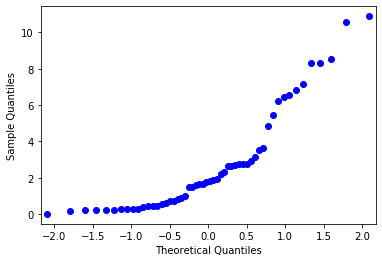

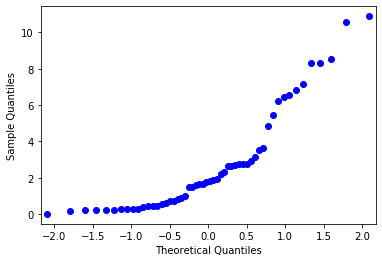

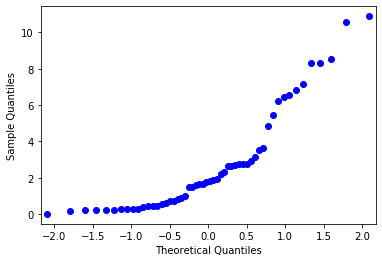

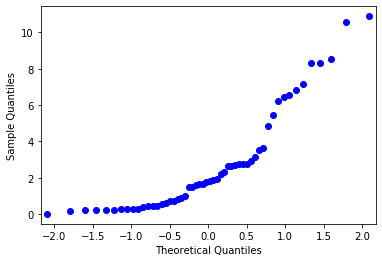

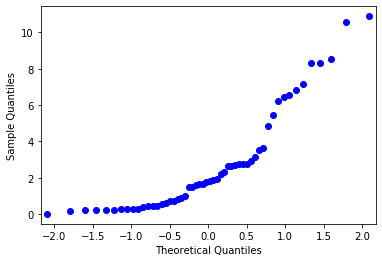

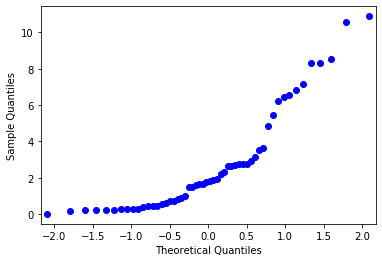

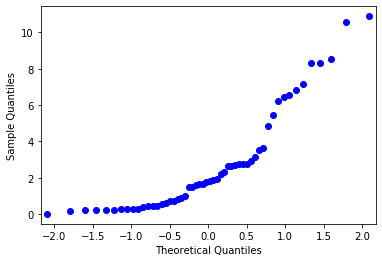

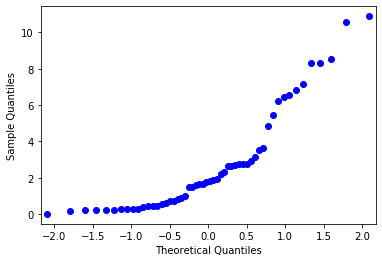

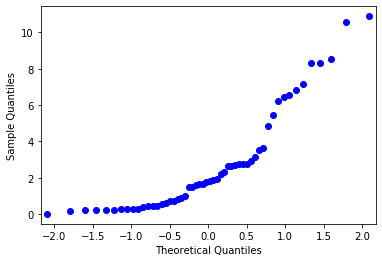

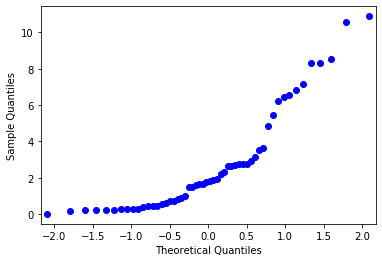

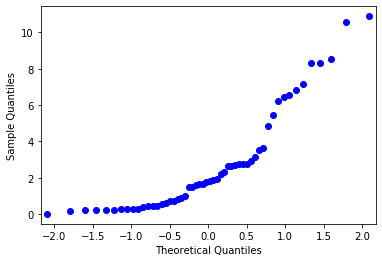

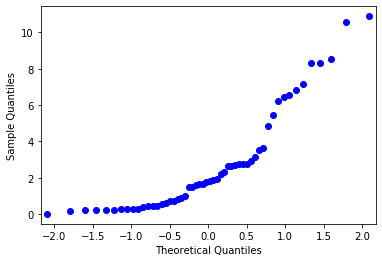

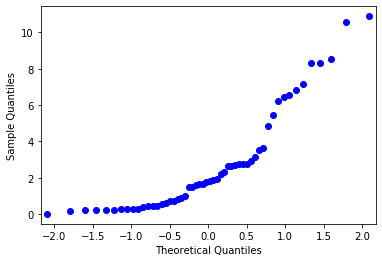

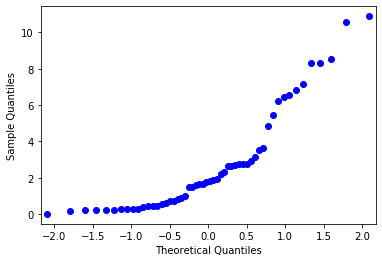

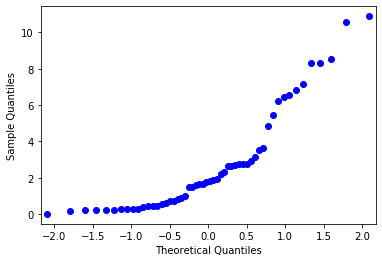

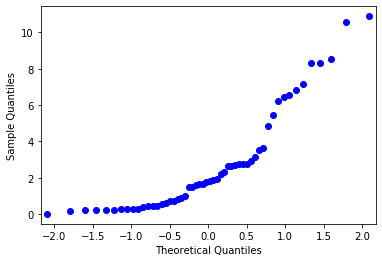

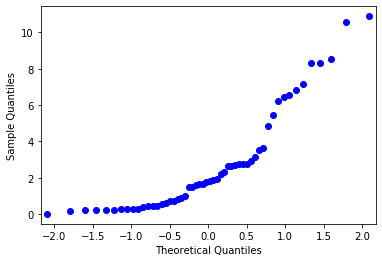

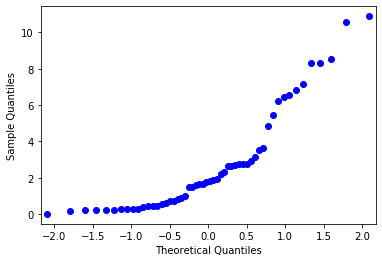

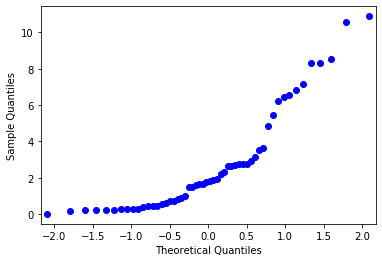

In [221]:
for x in df.group:
    sm.qqplot(df.genome)

In [223]:
L=[]
for x in df.group:
    if df.group == decapods:
        L.append(df.genome)

NameError: name 'decapods' is not defined

<h3>Population and sample</h3>
We will set a population with the mean and variance from our dataset and simulate the sampling process.

We recreate the data using the mean and standard deviation assuming it was a normal distribution.

In [123]:
df.mean()

genome    2.75537
dtype: float64

In [124]:
df.std()

genome    2.867481
dtype: float64

In [125]:
df.var()

genome    8.222448
dtype: float64

In [132]:
np.sqrt(8.222448)

2.8674811246109364

with that we see that var=std^2

In [134]:
df1=df.log10()

AttributeError: 'DataFrame' object has no attribute 'log10'

In [142]:
df.apply(np.sqrt)
df

TypeError: loop of ufunc does not support argument 0 of type str which has no callable sqrt method

In [189]:
np.random.seed(0)
genomesize = np.random.normal(0.1476808, 0.5976242, 27)
print(genomesize) #no idea why but doesn't work

[ 1.20192117  0.38682443  0.7325983   1.48689281  1.26377865 -0.43636411
  0.71547663  0.05722607  0.08599472  0.3930644   0.23376472  1.01678984
  0.60249536  0.22039673  0.41294421  0.34709265  1.04057861  0.02507326
  0.33477763 -0.36274748 -1.3780477   0.53829909  0.66428879 -0.29585498
  1.50414109 -0.72148332  0.1750272 ]


[ 1.29687749e+00  1.03247227e+00  1.26377923e+00  6.89155014e-01
 -3.67008511e-01  1.28918184e+00 -1.24845002e-02  6.27248162e-01
  7.13781499e-01  5.50430171e-02  5.14669492e-01  6.98813824e-01
  3.72641807e-01 -5.09347718e-01  3.25915150e-01  9.40361110e-01
 -2.67409762e-01  5.82555775e-02 -1.12377493e-01  1.25284556e+00
  5.49460416e-01  3.91189854e-01 -3.12439678e-01  4.69949167e-01
 -2.55316717e-01  1.66703512e-01 -2.32316204e-01  5.51933707e-01
  4.92265426e-01  2.31964228e-02  3.84343995e-01 -5.05559210e-01
 -7.43530826e-01  4.10271914e-01  2.47288914e-01  5.27190954e-01
  1.57190579e+00  7.12124598e-01 -3.97843852e-01  8.15236766e-01
 -6.38737313e-01 -1.28173330e-01  1.06897965e-01  1.17161587e+00
 -2.97402705e-01 -3.46218871e-01  8.88431889e-02 -2.48829880e-01
  8.20985692e-01 -4.97712404e-01 -5.38074235e-01 -1.13971054e-01
 -1.49955445e-01  1.30081585e+00  7.15077650e-01  2.00003541e-01
 -5.84669122e-01  6.52292548e-01 -4.50072097e-01 -7.75511791e-01
  8.57676154e-01  3.37093

{'whiskers': [<matplotlib.lines.Line2D at 0x20cd4fc3c88>,
 'caps': [<matplotlib.lines.Line2D at 0x20cd4fc8e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cd4fc1e08>],
 'medians': [<matplotlib.lines.Line2D at 0x20cd4fcb5c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cd4fd0fc8>],
 'means': []}

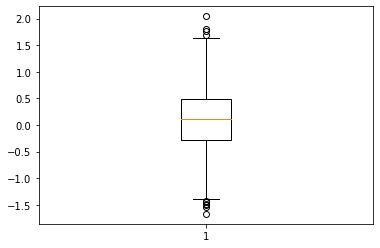

In [180]:
genome_size = np.random.normal(0.1476808, 0.5976242, 1000)
print(genome_size) 
plt.boxplot(genome_size)

(array([  8.,  24.,  83., 185., 255., 225., 135.,  59.,  22.,   4.]),
 array([-1.67276801, -1.301218  , -0.92966799, -0.55811799, -0.18656798,
         0.18498203,  0.55653203,  0.92808204,  1.29963205,  1.67118206,
         2.04273206]),
 <a list of 10 Patch objects>)

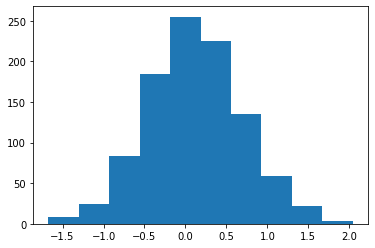

In [181]:
plt.hist(genome_size)

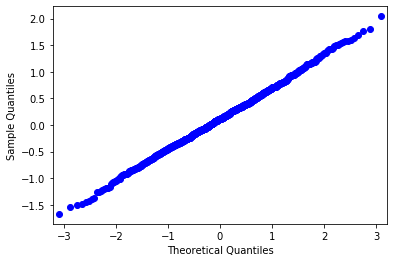

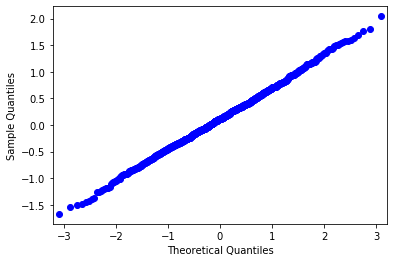

In [182]:
sm.qqplot(genome_size)

In [241]:
def doSampling(dat, numSamples, sizeSamples):
    "does sampling"
    for i in range(numsamples):
        get_sample=np.random.choice(dat,size=sizeSamples, replace=True)
        yield np.mean(get_sample)
    

In [192]:
x=doSampling(genomesize, 10,27)


TypeError: fromiter() missing required argument 'dtype' (pos 2)

<h1> USEFUL THINGS i LEARNT
    

In [232]:
df[df.genome >3] #this is very useful, and it is how we select data from a dataframe.

,group,genome
12,Decapods,3.55
13,Decapods,3.66
16,Decapods,4.84
18,Decapods,6.20
19,Decapods,8.29
20,Decapods,8.53
21,Decapods,10.58
22,Decapods,6.56
23,Decapods,7.16
24,Decapods,8.30


In [233]:
df.group == "decapods" #if we only use this condition, it will tell us in which samples the condition we set is true. 
#If we used [] as above, we create a new dataframe (and we can name it however we want) that will contain only the data that accomplishes the condition.

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
Name: group, dtype: bool

(array([6., 1., 0., 2., 0.]),
 array([1, 3, 4, 5, 7, 9]),
 <a list of 5 Patch objects>)

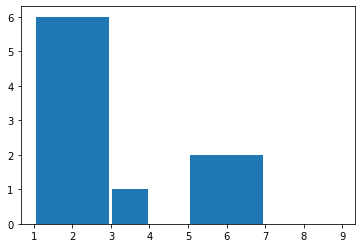

In [234]:
plt.hist(x.genome, bins=[1,3,4,5,7,9], rwidth=0.95) #here we plot an histogram with the data of the genome using the bins we tell them, each one of them has 95% of its width

In [ ]:
També es pot fer servir

In [244]:
decapods=df.iloc[0:27, 1]
decapods.head()

0    1.60
1    1.65
2    1.80
3    1.90
4    1.94
Name: genome, dtype: float64